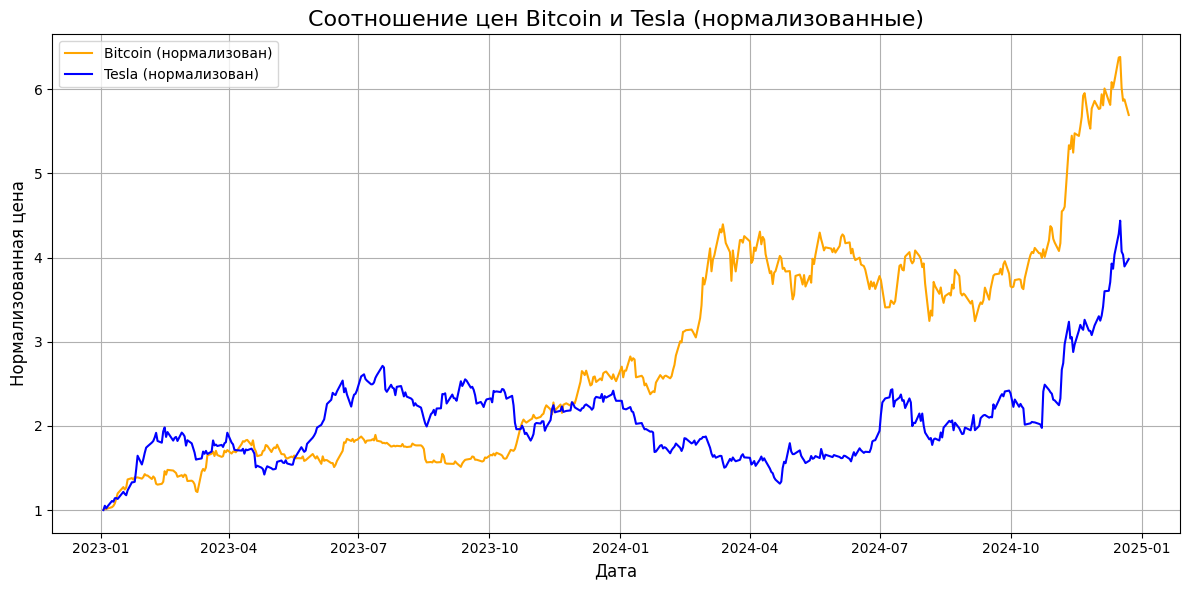

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
btc_data = pd.read_csv('BTC-USD.csv')
tesla_data = pd.read_csv('TSLA.csv')

# Преобразование дат в формат datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Удаление пропущенных значений
btc_data = btc_data.dropna()
tesla_data = tesla_data.dropna()

# Нормализация цен (приведение к одному масштабу)
btc_data['Normalized_Close'] = btc_data['Close'] / btc_data['Close'].iloc[0]
tesla_data['Normalized_Close'] = tesla_data['Close'] / tesla_data['Close'].iloc[0]

# Объединение данных по дате
merged_data = pd.merge(
    btc_data[['Date', 'Normalized_Close']].rename(columns={'Normalized_Close': 'BTC'}),
    tesla_data[['Date', 'Normalized_Close']].rename(columns={'Normalized_Close': 'Tesla'}),
    on='Date',
    how='inner'
)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['BTC'], label='Bitcoin (нормализован)', color='orange')
plt.plot(merged_data['Date'], merged_data['Tesla'], label='Tesla (нормализован)', color='blue')

# Добавление подписей и легенды
plt.title('Соотношение цен Bitcoin и Tesla (нормализованные)', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Нормализованная цена', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.show()